In [10]:
%load_ext autoreload
%autoreload 2
import pytest
import tifffile as tff
import fibsem.fibsemImage as fb
import numpy as np
import os
from fibsem.structures import BeamType, GammaSettings, ImageSettings
from autoscript_sdb_microscope_client.structures import AdornedImage
from matplotlib import pyplot as plt



def test_metadata():
    array1 = np.random.rand(256,256)
    from matplotlib import pyplot as plt
    plt.imshow(array1, interpolation='nearest')
    plt.show()    
    gamma_dict = {
        "enabled": True,
        "min_gamma": 0.5,
        "max_gamma": 1.8,
        "scale_factor": 0.01,
        "threshold": 46
    }
    Image_settings = {
        "resolution": "1536x1024",
        "dwell_time": 1.e-6,
        "hfw": 150.e-6,
        "autocontrast": True,
        "beam_type": "ELECTRON", 
        "gamma": gamma_dict,
        "save": False,
        "save_path": "path",
        "label": "label"
    }

    metadata = fb.Metadata(
            image_settings = ImageSettings.__from_dict__(Image_settings)
        )
    img = fb.fibsemImage(array1, metadata)
    img.save_to_TIFF('test.tif')
    img.load_from_TIFF('test.tif')
    plt.imshow(img.data, interpolation='nearest')
    plt.show() 
    print(img.metadata)
    pass

img_settings = ImageSettings(
        resolution="32x32",
        dwell_time=1.e-6,
        hfw=150.e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=GammaSettings,
        save=False,
        save_path="path",
        label="label"
    )

def test_adorned_image_conversion(img_settings = ImageSettings):
    array1 = np.uint8(255 * np.random.rand(32, 32))
    metadata = img_settings
    img1 = fb.FibsemImage(array1, metadata)
    adorned = AdornedImage(array1)
    img2 = fb.FibsemImage.fromAdornedImage(adorned, metadata)
    plt.imshow(img2.data, interpolation='nearest')
    plt.show() 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


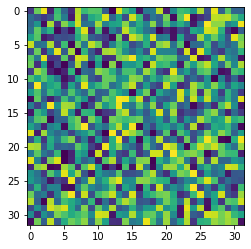

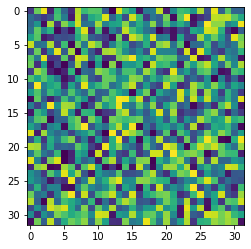

In [11]:
test_adorned_image_conversion(img_settings)